In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [39]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1= -0.17; k2 = -0.17;
k = 0.0
condition = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
# condition = SA[-0.5, -0.5, -0.5, -0.5, 0-0.5, -0.5]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [40]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
ds_HR = ContinuousDynamicalSystem(HR,  condition, p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [41]:
data = trajectory(ds_HR, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000))

6-dimensional Dataset{Float64} with 30000001 points
 -1.5        0.0        0.0          -2.5        0.0        0.0
 -1.36934   -0.0922662  8.35021e-5   -2.17188   -0.259935  -0.000363711
 -1.25641   -0.167023   0.000227692  -1.92455   -0.455251  -0.000585135
 -1.1572    -0.227777   0.000424763  -1.72926   -0.606306  -0.000696758
 -1.06882   -0.277126   0.000668607  -1.56971   -0.725359  -0.000720181
 -0.989179  -0.317049   0.000954352  -1.43593   -0.820336  -0.000670603
 -0.916652  -0.349086   0.00127805   -1.32142   -0.896637  -0.000559182
 -0.850002  -0.374455   0.00163647   -1.22172   -0.9581    -0.000394377
 -0.788252  -0.394142   0.00202691   -1.13369   -1.00754   -0.000182767
 -0.730617  -0.40895    0.00244712   -1.055     -1.04709    7.04157e-5
 -0.676463  -0.419546   0.00289522   -0.983948  -1.07839    0.000360944
 -0.625267  -0.42649    0.00336959   -0.919193  -1.10272    0.000685346
 -0.576593  -0.430258   0.00386886   -0.859714  -1.12113    0.00104073
  ⋮                   

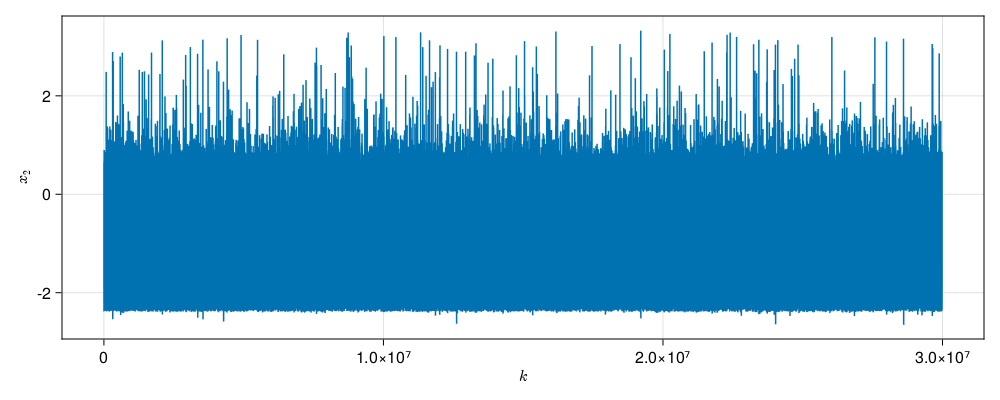

In [42]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
lines!((data[15000:end, 1] + data[15000:end, 4]), lw = 0.5)
fig

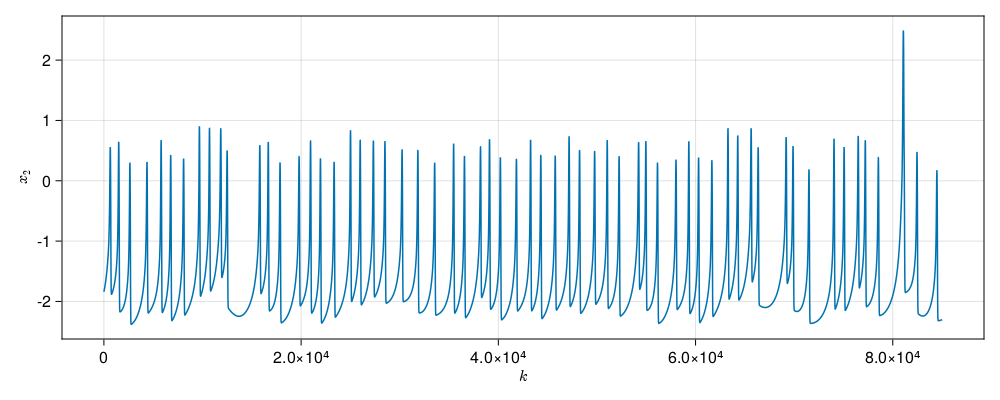

In [43]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
lines!((data[15000:100000, 1] + data[15000:100000, 4]), lw = 0.5)
fig

In [44]:
spectrum = lyapunovspectrum(ds_HR, 300000.0; diffeq = (alg = Vern9(),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 50000000
                                                            ))

6-element Vector{Float64}:
   0.015152108875775323
   0.005142456272950908
  -8.817068066923377e-6
  -0.027103430647277608
  -6.41404540028173
 -11.536897909040373

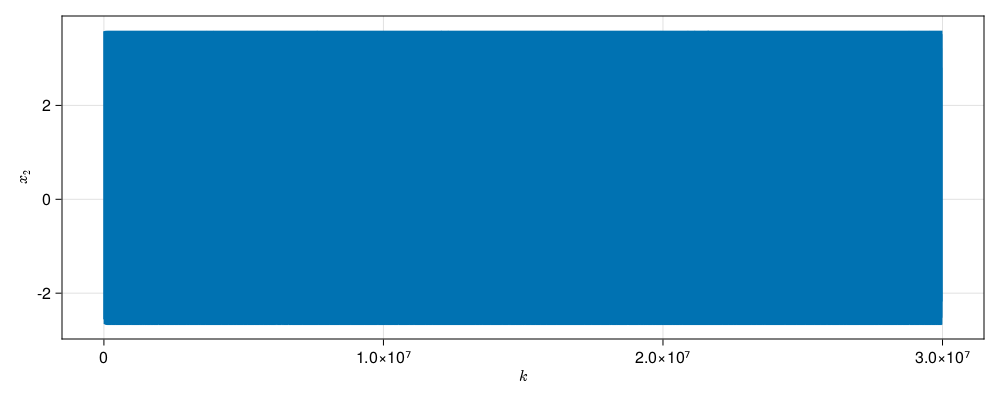

In [35]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
lines!((data[15000:end, 1] + data[15000:end, 4]), lw = 0.5)
fig

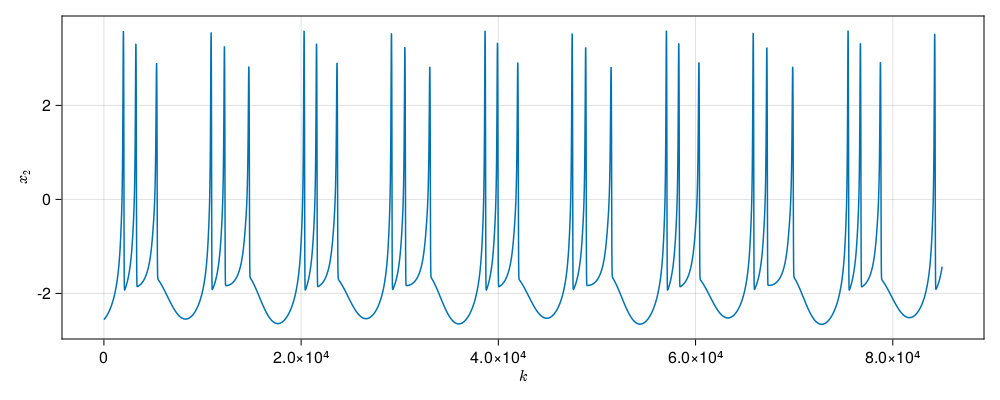

In [36]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
lines!((data[15000:100000, 1] + data[15000:100000, 4]), lw = 0.5)
fig

In [38]:
spectrum = lyapunovspectrum(ds_HR, 300000.0; diffeq = (alg = Vern9(),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 50000000
                                                            ))

6-element Vector{Float64}:
  0.09776013364077904
  0.014967711042205322
  9.367382175861574e-6
 -0.004395219495832511
 -8.802063982966525
 -8.826974002146809